# import model 

In [27]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import warnings
import pickle
warnings.filterwarnings('ignore')

# import dataset

In [28]:
df = pd.read_csv('WineQT.csv')

# Tampilkan info dataset

In [29]:
print("dataset info =", df.info)

df.head()

dataset info = <bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12            

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Pisahkan fitur (X) dan target (y)

In [30]:
X = df.drop(columns=['quality', 'Id'])  # menghapus kolom id dan quality karena bukan fitur  
y = df['quality']

print("Fitur ( X ) ", X)
print("Target ( y ) unique values =", y)

Fitur ( X )        fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sul

 # Preprocessing Train-Test Split & Scaling

# Split data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling fitur

In [32]:
# Scaling fitur
scaler = StandardScaler()

# Latih scaler pada data training
X_train = scaler.fit_transform(X_train)

# Transform fitur X_test
X_test = scaler.transform(X_test)


# Inisialisasi dan latih model

In [33]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)  # atau gunakan X_train langsung tanpa scaling

,priors,None
,var_smoothing,1e-09


# Prediksi

In [34]:
y_pred = nb_model.predict(X_test)
print("hasil prediksi =", y_pred)

hasil prediksi = [5 4 5 5 5 5 5 6 6 7 5 6 5 5 6 5 6 5 5 5 7 5 5 5 5 5 5 6 6 6 5 5 6 7 6 5 6
 5 5 6 5 6 5 6 5 5 6 6 7 6 5 7 5 7 5 5 5 5 5 6 6 5 6 5 5 5 6 5 5 6 5 5 6 7
 6 7 7 7 5 6 5 5 6 6 7 5 4 3 5 6 7 7 4 5 6 6 5 5 5 5 4 6 8 5 6 6 5 6 6 5 5
 6 5 7 5 6 5 7 5 6 6 5 5 6 7 6 6 7 5 6 7 6 5 5 3 7 5 7 5 5 6 4 7 8 6 5 6 7
 8 5 6 6 6 6 5 5 6 7 6 4 6 7 5 6 5 5 7 5 7 6 5 5 5 6 6 7 6 6 5 6 5 5 6 5 5
 5 6 5 5 7 7 6 5 6 7 5 5 6 5 6 6 6 6 7 4 5 5 4 5 5 7 6 7 7 6 5 6 7 5 6 6 6
 5 5 6 6 8 5 5]


# Akurasi

In [35]:
akurasi_naive = accuracy_score(y_test, y_pred)
print(f"akurasi model Naive Bayes = ",akurasi_naive)

akurasi model Naive Bayes =  0.6069868995633187


# Evaluasi model

Test Accuration:  0.6069868995633187
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.29      0.27         7
           5       0.72      0.73      0.72       100
           6       0.62      0.52      0.56        92
           7       0.43      0.56      0.48        27
           8       0.25      0.50      0.33         2

    accuracy                           0.61       229
   macro avg       0.38      0.43      0.40       229
weighted avg       0.62      0.61      0.61       229



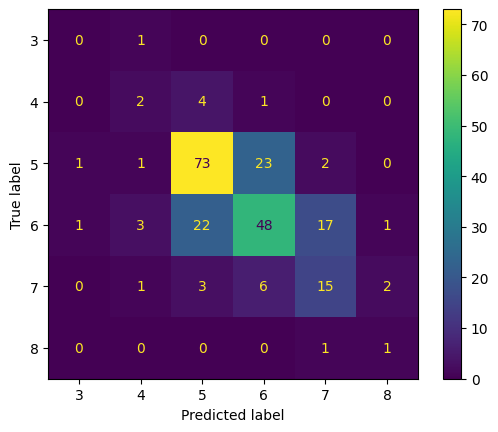

In [36]:
print("Test Accuration: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Confusion Matrix

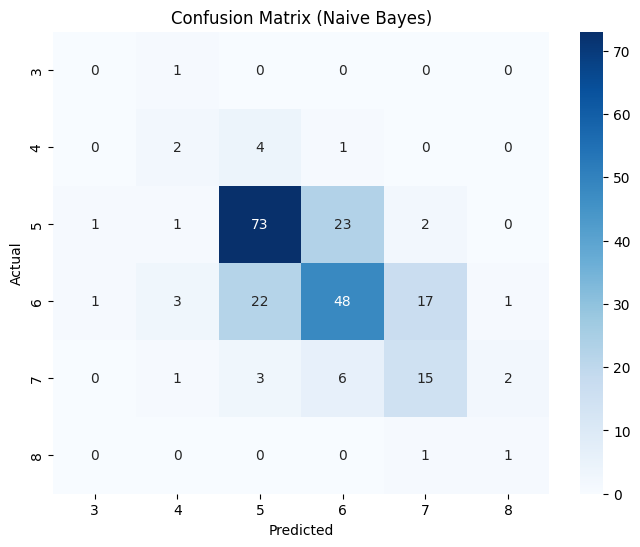

In [37]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualisasi distribusi kualitas wine

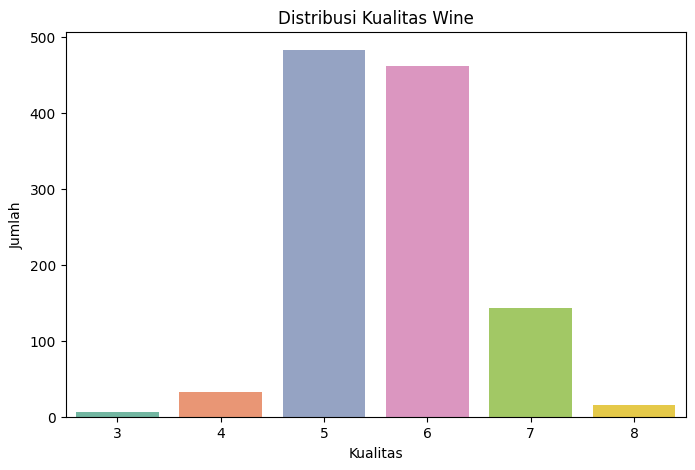

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='Set2')
plt.title('Distribusi Kualitas Wine')
plt.xlabel('Kualitas')
plt.ylabel('Jumlah')
plt.show()

# Prediksi data baru

In [ ]:
# Contoh data baru (1 sampel)
new_data = np.array([[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]])

# Scaling (gunakan scaler)
new_data_scaled = scaler.transform(new_data)

# Prediksi
pred_quality = nb_model.predict(new_data_scaled)
pred_proba = nb_model.predict_proba(new_data_scaled)

print(f"prediksi kualitas = {pred_quality[0]}")
print("probabilitas dari masing-masing kelas = ")


for quality, prob in zip(nb_model.classes_, pred_proba[0]):
    print(f"  kuualitas atau quality =  {quality} || dengan peluang atau probabilitas atau peluaang = {prob}")

prediksi kualitas = 5
probabilitas dari masing-masing kelas = 
  kuualitas atau quality =  3 || dengan peluang atau probabilitas atau peluaang = 0.11247094921618711
  kuualitas atau quality =  4 || dengan peluang atau probabilitas atau peluaang = 0.2687627508777531
  kuualitas atau quality =  5 || dengan peluang atau probabilitas atau peluaang = 0.40653213450773706
  kuualitas atau quality =  6 || dengan peluang atau probabilitas atau peluaang = 0.21198304697727333
  kuualitas atau quality =  7 || dengan peluang atau probabilitas atau peluaang = 0.0001989093208974324
  kuualitas atau quality =  8 || dengan peluang atau probabilitas atau peluaang = 5.2209100151787635e-05


# simpan model naive bayes 

In [40]:

with open('naive_bayes_data_wine.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)


with open('wine_quality_scaler_naive_bayes.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("model dan scaler berhasil disimpan")

model dan scaler berhasil disimpan
